In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv(r"Weather Data.csv")

### Explore the data

In [4]:
data.sample(10)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
7343,11/1/2012 23:00,5.5,2.9,83,19,25.0,99.38,Rain
7703,11/16/2012 23:00,-1.5,-3.5,86,13,25.0,102.84,Mainly Clear
3083,5/8/2012 11:00,11.0,9.2,89,20,6.4,100.37,"Rain,Fog"
5375,8/11/2012 23:00,20.0,18.8,93,9,25.0,100.71,Mostly Cloudy
6991,10/18/2012 7:00,10.7,5.1,68,9,48.3,100.98,Mainly Clear
3257,5/15/2012 17:00,18.2,15.3,83,17,24.1,100.85,Mostly Cloudy
7804,11/21/2012 4:00,-1.9,-3.7,87,9,25.0,101.85,Mainly Clear
2440,4/11/2012 16:00,9.5,1.4,57,20,24.1,100.82,Mostly Cloudy
3533,5/27/2012 5:00,13.7,3.9,52,13,24.1,101.90,Mostly Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy


In [5]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [8]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [9]:
data["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [10]:
data["Weather"].value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

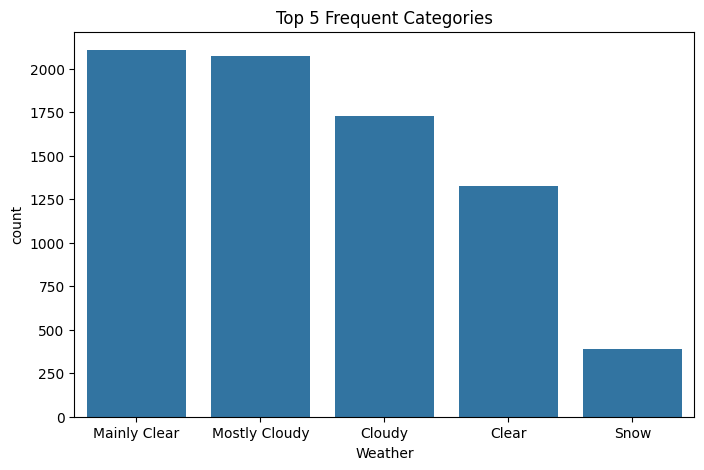

In [11]:
top_categories = data["Weather"].value_counts().nlargest(5).index
df_top = data[data["Weather"].isin(top_categories)]
plt.figure(figsize=(8, 5))
sns.countplot(data=df_top, x="Weather", order=top_categories)
plt.title("Top 5 Frequent Categories")
plt.show()

In [12]:
data = data.drop(["Date/Time", "Weather"], axis=1)

<Axes: >

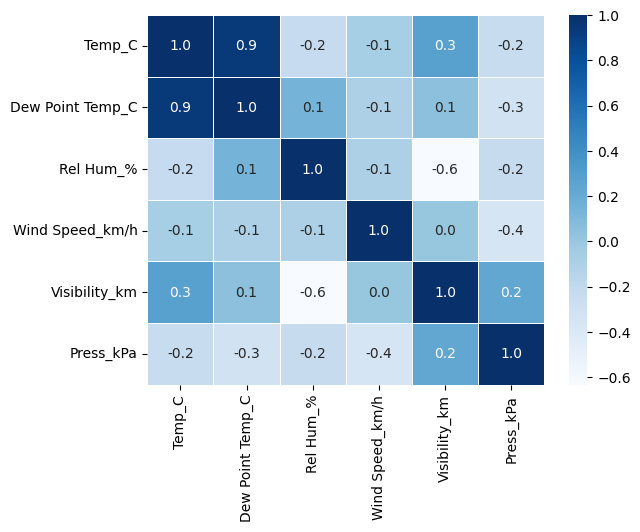

In [13]:
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidths=0.5, cmap="Blues")

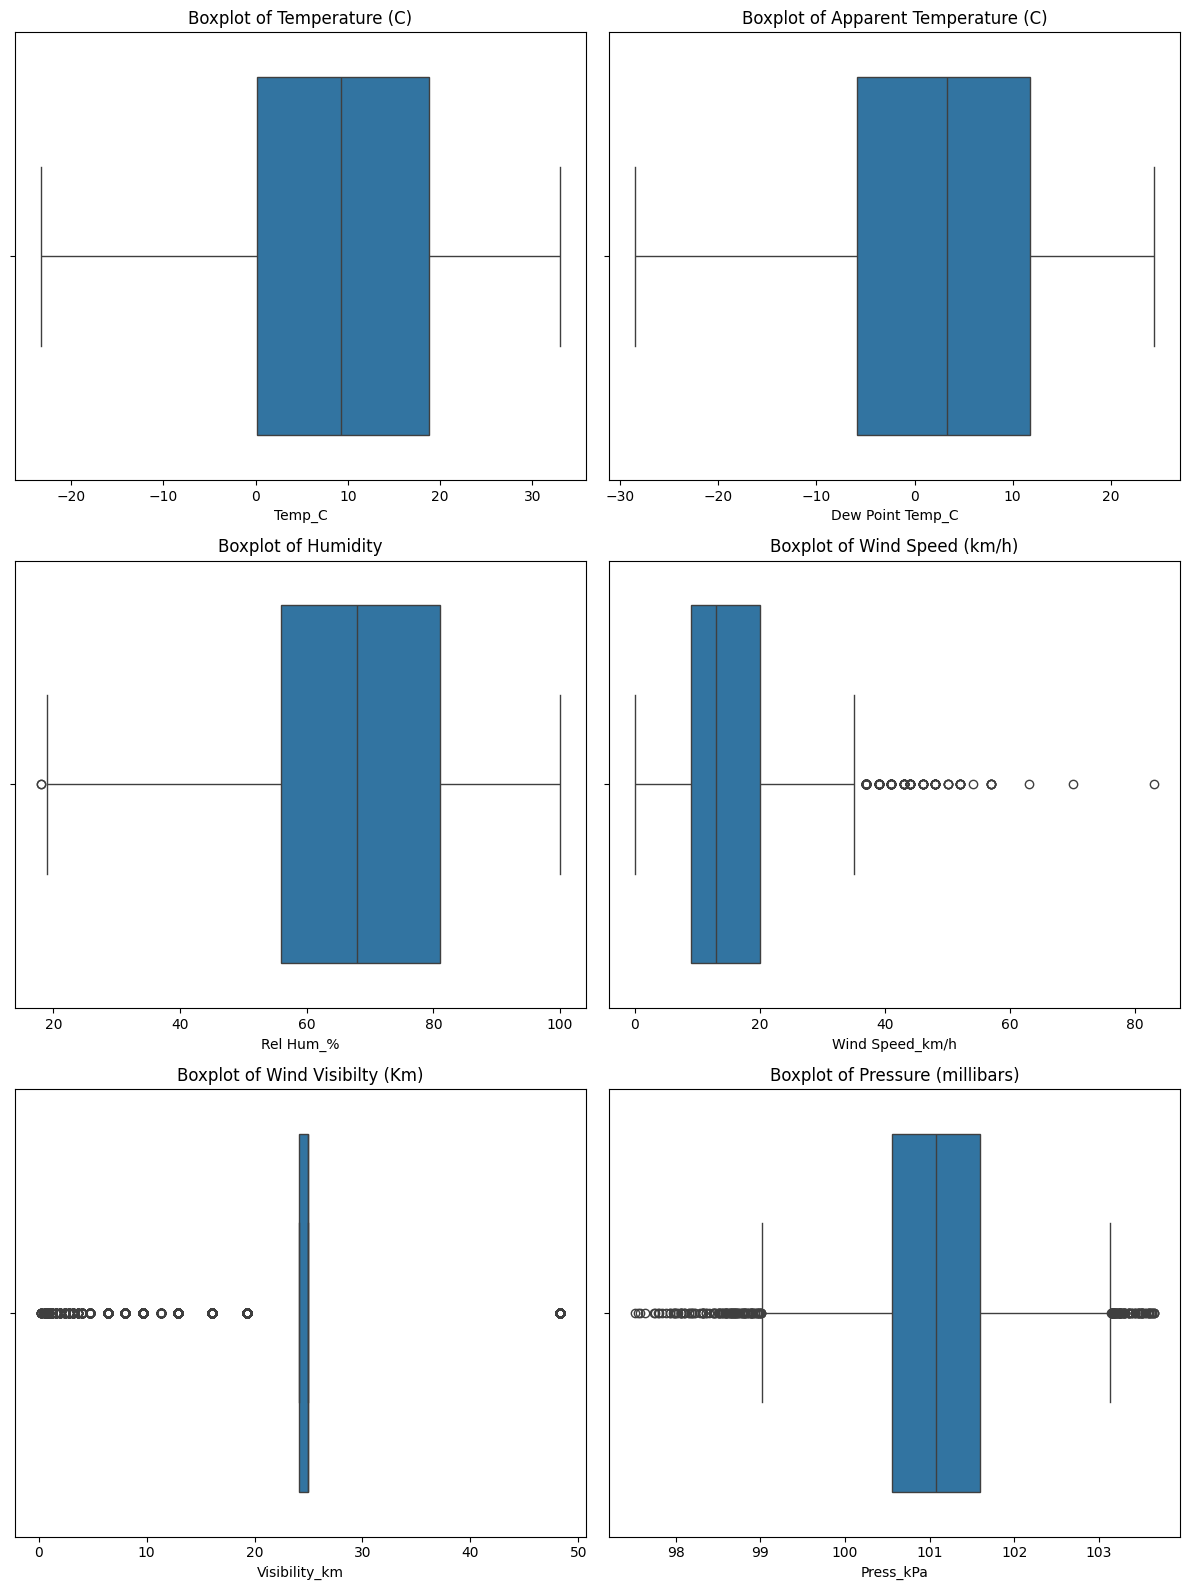

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
sns.boxplot(x=data["Temp_C"], ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Temperature (C)")

sns.boxplot(x=data["Dew Point Temp_C"], ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Apparent Temperature (C)")

sns.boxplot(x=data["Rel Hum_%"], ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Humidity")

sns.boxplot(x=data["Wind Speed_km/h"], ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Wind Speed (km/h)")

sns.boxplot(x=data["Visibility_km"], ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Wind Visibilty (Km)")

sns.boxplot(x=data["Press_kPa"], ax=axes[2, 1])
axes[2, 1].set_title("Boxplot of Pressure (millibars)")

plt.tight_layout()
plt.show()


### ML Model

In [15]:
x = data.drop(["Temp_C"], axis=1)
y = data["Temp_C"] 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
model = XGBRegressor()
model.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
pre = model.predict(x_test)

In [19]:
print(
    f"R2_Score = {round(r2_score(y_test, pre), 3)} , MSE = {round(mean_squared_error(y_test, pre), 3)}"
)

R2_Score = 0.999 , MSE = 0.09
